<a href="https://colab.research.google.com/github/airctic/icedata/blob/master/notebooks/dev/plantdoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

## Warning
This notebook is a work in progress document. We are sharing it with the IceVision Community through our Live Code Session (beginners-friendly). If you are interested in attending, please feel free to [join us](http://tinyurl.com/IceData)

## About the PlantDoc Dataset
PlantDoc is dataset for visual plant disease detection. It contains
2,598 data images with 13 plant species and 17 classesof diseases.

- Dataset [Repository](https://github.com/pratikkayal/PlantDoc-Object-Detection-Dataset)
- Paper: [PlantDoc: A Dataset for Visual Plant Disease Detection](https://arxiv.org/pdf/1911.10317.pdf)

# A Parser Example: Subclassing VocXmlParser parser
The PlantDoc Dataset provides both the VOC annoatation and a CSV annotation. 

> **Goal**: This notebook shows how to parse the PlantDoc dataset using 2 different methods:
- Using the Icevision default VOC parser
- Creating a new parser using the csv annotation file



## Installing IceVision

!!! warning "Google Colab Dependencies Incompatibilities "
    This issue is specific to Google Colab. The issue shouldn't occur on a local machine.
    Some of our external dependencies are not aligned with the dependencies pre-installed in Google Colab. 
    After pip installing both icevision and icedata (by runnning the cell here below), some errors will eventually pop up.
    To fix this issue, press the **RESTART RUNTIME** button.

In [ ]:
# Instaling from GitHub master
!pip install git+git://github.com/airctic/icevision.git#egg=icevision[all] --upgrade

## Imports

In [4]:
from icevision.all import *

## Clone the PlantDoc dataset repository


In [5]:
dataset_name = 'plantdoc'

In [ ]:
!git clone https://github.com/pratikkayal/PlantDoc-Object-Detection-Dataset.git

In [7]:
# Change current directory (use % instead of the usual !)
%cd PlantDoc-Object-Detection-Dataset/

/content/PlantDoc-Object-Detection-Dataset


In [8]:
!ls

LICENSE.txt  TEST  test_labels.csv  TRAIN  train_labels.csv


In [9]:
import pandas as pd

# Read csv file. rename the "class" column with "label" to avoid conflicts
train_labels = pd.read_csv('train_labels.csv')
train_labels.rename(columns={'class':'label'}, inplace=True)
train_labels.sample(5)

filename  width  height  ... ymin  xmax  ymax
1690  yoshino-weeping-cherry-tree2.jpg    800     600  ...  294   377   474
3984       tomato_septoria_05_zoom.jpg    900     598  ...    2   379   183
490                        b-speck.jpg   1920    1440  ...   52  1430  1397
5177      autumn,+blueberry+leaves.jpg    700     620  ...   25   700   243
4369            7-blueberry-leaves.jpg   1200    1197  ...   94   648   314

[5 rows x 8 columns]

In [25]:
len(train_labels)

8469

### Define class_map

PlantDoc: a dataset of 2,598 images across 13 plant species and 27 classes(17-10, disease-healthy)

In [10]:
# Get the classes 
_CLASSES = train_labels["label"].unique().tolist()
_CLASSES

['Cherry leaf',
 'Peach leaf',
 'Corn leaf blight',
 'Apple rust leaf',
 'Potato leaf late blight',
 'Strawberry leaf',
 'Corn rust leaf',
 'Tomato leaf late blight',
 'Tomato mold leaf',
 'Potato leaf early blight',
 'Apple leaf',
 'Tomato leaf yellow virus',
 'Blueberry leaf',
 'Tomato leaf mosaic virus',
 'Raspberry leaf',
 'Tomato leaf bacterial spot',
 'Squash Powdery mildew leaf',
 'grape leaf',
 'Corn Gray leaf spot',
 'Tomato Early blight leaf',
 'Apple Scab Leaf',
 'Tomato Septoria leaf spot',
 'Tomato leaf',
 'Soyabean leaf',
 'Bell_pepper leaf spot',
 'Bell_pepper leaf',
 'grape leaf black rot',
 'Potato leaf',
 'Tomato two spotted spider mites leaf']

In [11]:
class_map = ClassMap(_CLASSES)

In [12]:
class_map.get_name('Potato leaf early blight')

10

### Set images and annotations directories

In [13]:
data_dir = Path('./TRAIN')

images_dir = data_dir
annotations_dir = data_dir

In [14]:
images_dir.ls()

(#4720) [Path('TRAIN/applescab_lf.jpg'),Path('TRAIN/TC6-300x194.xml'),Path('TRAIN/strawberry-leaf-stock-image-3662904.jpg'),Path('TRAIN/05-069f1.jpg'),Path('TRAIN/53840458-raspberry-leaf.jpg'),Path('TRAIN/cropped-symptom_potato_late_blight.xml'),Path('TRAIN/stock-photo-apple-tree-leaf-isolated-on-a-white-622503302.xml'),Path('TRAIN/stock-photo-peach-fruit-isolated-on-white-332799767.xml'),Path('TRAIN/Poison_Ivy.xml'),Path('TRAIN/apple-scab-venturia-inaequalis-germinated-from-a-spore-shower-on-an-aw08hw.jpg')...]

## Method 1: Using icevision predefined VOC parser

### Note
The PlantDoc dataset uses the VOC annotation. Both the individual annotation files and the image files are located in the **./TRAIN** folder.

In [15]:
parser = parsers.voc(annotations_dir=annotations_dir, images_dir=images_dir, class_map=class_map)

In [51]:
train_records, valid_records = parser.parse()

WARNING  - Record with imageid: NCLB was skipped because: File 'TRAIN/NCLB.jpg' does not exist | icevision.parsers.parser:parse_dicted:78
WARNING  - Record with imageid: early-blight-1 was skipped because: File 'TRAIN/early-blight-1.jpg' does not exist | icevision.parsers.parser:parse_dicted:78
WARNING  - Record with imageid: powdery-mildew-on-squash-leaves was skipped because: File 'TRAIN/powdery-mildew-on-squash-leaves.jpg' does not exist | icevision.parsers.parser:parse_dicted:78
INFO     - Autofixing records | icevision.parsers.parser:parse:124


AUTOFIX  - ️🔨  Autofixing record with imageid: 2283  ️🔨 | icevision.core.record:_pre_replay:81
AUTOFIX  - Clipping bbox ymax from 1466 to image height 1224 | icevision.core.bbox:autofix:77
AUTOFIX  - Failed to fix: <BBox (xmin:190, ymin:1273, xmax:453, ymax:1224)> | icevision.core.record_mixins:_autofix:153
AUTOFIX  - Clipping bbox ymax from 1388 to image height 1224 | icevision.core.bbox:autofix:77
AUTOFIX  - Removed annotation with index: 0 | icevision.core.record:autofix:34
AUTOFIX  - ️🔨  Autofixing record with imageid: 2235  ️🔨 | icevision.core.record:_pre_replay:81
AUTOFIX  - Clipping bbox ymax from 1479 to image height 1152 | icevision.core.bbox:autofix:77
AUTOFIX  - Failed to fix: <BBox (xmin:103, ymin:1222, xmax:653, ymax:1152)> | icevision.core.record_mixins:_autofix:153
AUTOFIX  - Clipping bbox ymax from 1284 to image height 1152 | icevision.core.bbox:autofix:77
AUTOFIX  - Removed annotation with index: 0 | icevision.core.record:autofix:34
AUTOFIX  - ️🔨  Autofixing record wit

In [17]:
train_records[0].bboxes

[<BBox (xmin:10, ymin:437, xmax:600, ymax:766)>]

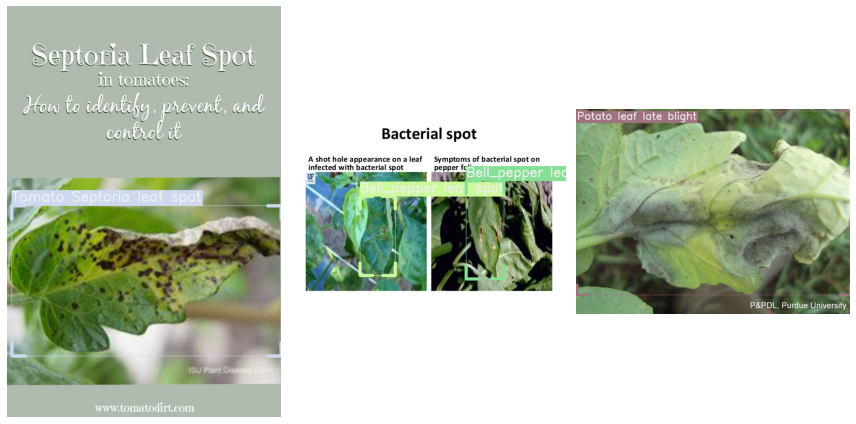

In [18]:
show_records(train_records[:3], ncols=3, class_map=class_map)

## Method 2: Creating a new parser from *scratch*

In [22]:
class PlantDocParser(parsers.FasterRCNN, parsers.FilepathMixin, parsers.SizeMixin):
    def __init__(self, df, source, class_map):
        self.df = df
        self.source = source
        self.class_map = class_map

    # def chexk_file(self, ):

    def __iter__(self):
        yield from self.df.itertuples()

    def __len__(self):
        return len(self.df)  

    def imageid(self, o) -> Hashable:
        return Path(o.filename).stem

    def filepath(self, o) -> Union[str, Path]:
        return self.source / o.filename

    def image_width_height(self, o) -> Tuple[int, int]:
        return get_image_size(self.filepath(o))

    def labels(self, o) -> List[int]:
        return [class_map.get_name(o.label)]

    def bboxes(self, o) -> List[BBox]:
        xmin = o.xmin
        xmax = o.xmax
        ymin = o.ymin
        ymax = o.ymax
        return [BBox.from_xyxy(xmin, ymin, xmax, ymax)]

In [23]:
source = Path("./TRAIN")
parser_csv = PlantDocParser(train_labels, source=source, class_map=class_map)

In [49]:
train_records_csv, valid_records_csv = parser_csv.parse()

WARNING  - Record with imageid: NCLB was skipped because: File 'TRAIN/NCLB.jpg' does not exist | icevision.parsers.parser:parse_dicted:78
WARNING  - Record with imageid: NCLB was skipped because: File 'TRAIN/NCLB.jpg' does not exist | icevision.parsers.parser:parse_dicted:78
WARNING  - Record with imageid: early-blight-1 was skipped because: File 'TRAIN/early-blight-1.jpg' does not exist | icevision.parsers.parser:parse_dicted:78
WARNING  - Record with imageid: early-blight-1 was skipped because: File 'TRAIN/early-blight-1.jpg' does not exist | icevision.parsers.parser:parse_dicted:78
WARNING  - Record with imageid: early-blight-1 was skipped because: File 'TRAIN/early-blight-1.jpg' does not exist | icevision.parsers.parser:parse_dicted:78
WARNING  - Record with imageid: early-blight-1 was skipped because: File 'TRAIN/early-blight-1.jpg' does not exist | icevision.parsers.parser:parse_dicted:78
WARNING  - Record with imageid: early-blight-1 was skipped because: File 'TRAIN/early-blight

AUTOFIX  - ️🔨  Autofixing record with imageid: 199  ️🔨 | icevision.core.record:_pre_replay:81
AUTOFIX  - Clipping bbox ymax from 3022 to image height 2448 | icevision.core.bbox:autofix:77
AUTOFIX  - ️🔨  Autofixing record with imageid: 479  ️🔨 | icevision.core.record:_pre_replay:81
AUTOFIX  - Clipping bbox ymax from 479 to image height 332 | icevision.core.bbox:autofix:77
AUTOFIX  - Clipping bbox xmax from 640 to image width 598 | icevision.core.bbox:autofix:71
AUTOFIX  - ️🔨  Autofixing record with imageid: 2104  ️🔨 | icevision.core.record:_pre_replay:81
AUTOFIX  - Clipping bbox ymax from 2755 to image height 2448 | icevision.core.bbox:autofix:77
AUTOFIX  - Clipping bbox ymax from 3081 to image height 2448 | icevision.core.bbox:autofix:77
AUTOFIX  - ️🔨  Autofixing record with imageid: 1595  ️🔨 | icevision.core.record:_pre_replay:81
AUTOFIX  - Clipping bbox xmax from 3264 to image width 500 | icevision.core.bbox:autofix:71
AUTOFIX  - Clipping bbox ymax from 2274 to image height 375 | ice

In [26]:
!ls TRAIN/NCLB.jpg

ls: cannot access 'TRAIN/NCLB.jpg': No such file or directory


In [29]:
train_records_csv[1].bboxes

[<BBox (xmin:375, ymin:158, xmax:425, ymax:229)>,
 <BBox (xmin:461, ymin:281, xmax:583, ymax:367)>,
 <BBox (xmin:152, ymin:7, xmax:238, ymax:183)>,
 <BBox (xmin:103, ymin:366, xmax:161, ymax:413)>,
 <BBox (xmin:312, ymin:288, xmax:445, ymax:475)>,
 <BBox (xmin:396, ymin:247, xmax:469, ymax:402)>,
 <BBox (xmin:215, ymin:240, xmax:323, ymax:430)>,
 <BBox (xmin:25, ymin:160, xmax:204, ymax:279)>,
 <BBox (xmin:437, ymin:83, xmax:563, ymax:237)>,
 <BBox (xmin:249, ymin:18, xmax:339, ymax:217)>]

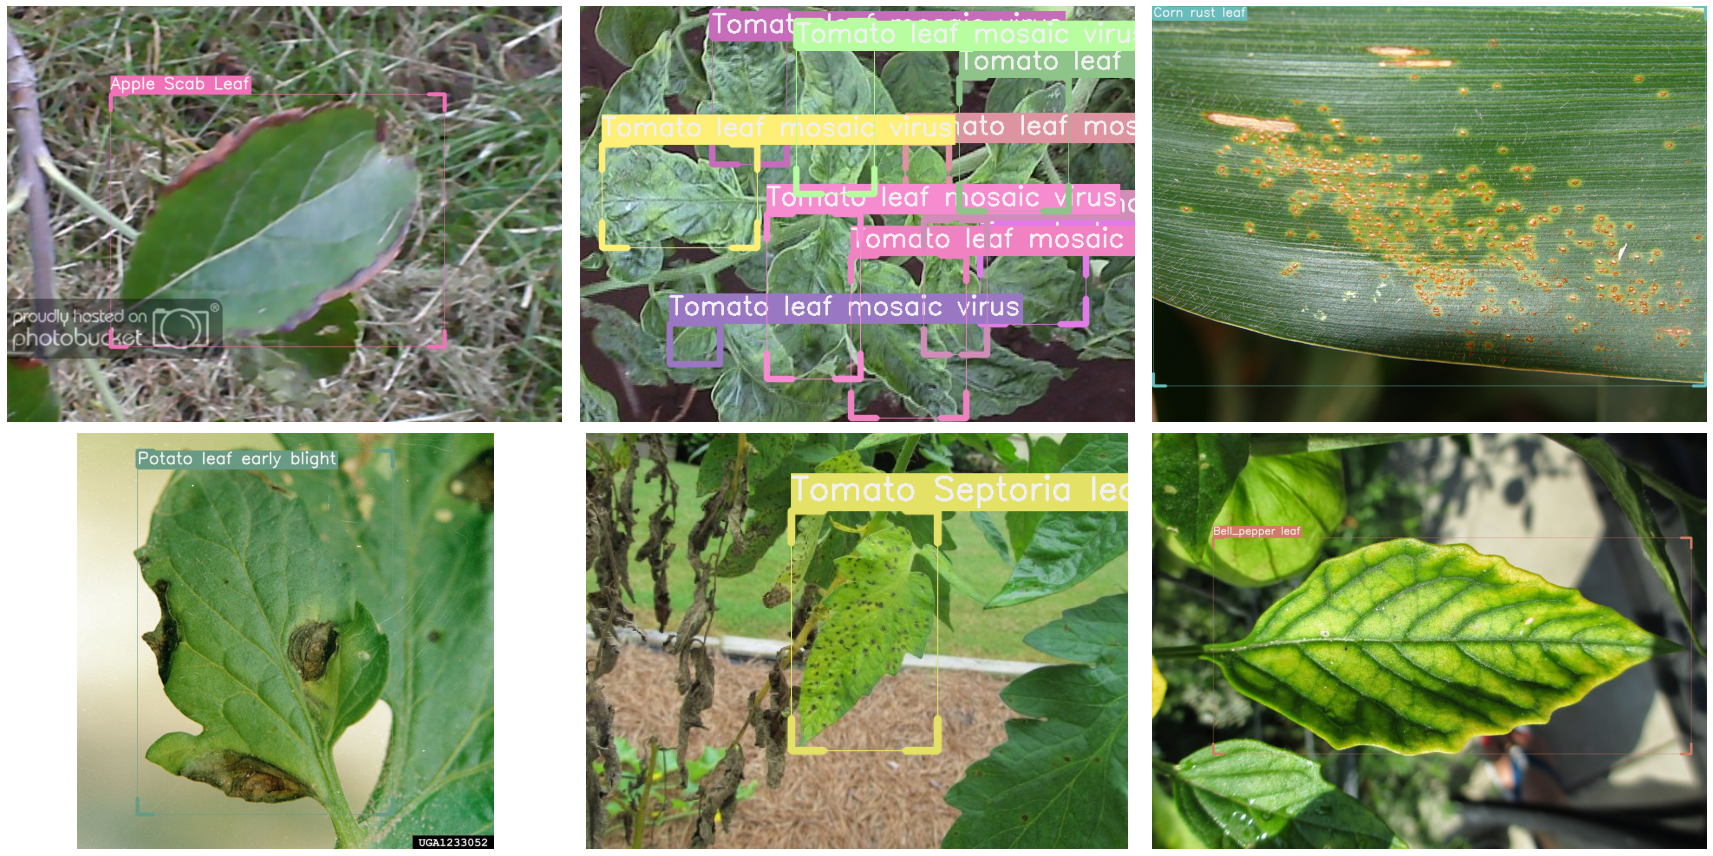

In [30]:
show_records(train_records_csv[:6], ncols=3, class_map=class_map)

### train and validation records

## Datasets
### Transforms

In [31]:
presize = 512
size = 384

train_tfms = tfms.A.Adapter([*tfms.A.aug_tfms(size=size, presize=presize), tfms.A.Normalize()])
# train_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(size=size), tfms.A.Normalize()])
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(size=size), tfms.A.Normalize()])

### Train and Validation Dataset Objects

In [32]:
train_ds = Dataset(train_records_csv, train_tfms)
valid_ds = Dataset(valid_records_csv, valid_tfms)

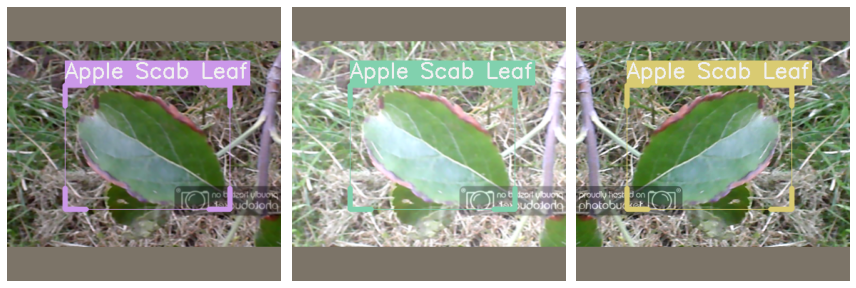

In [33]:
samples = [train_ds[0] for _ in range(3)]
show_samples(samples, class_map=class_map, denormalize_fn=denormalize_imagenet, ncols=3)

### DataLoaders

### Warning
As for now, EfficientDet doesn't work well for this dataset because some predictions return one-pixel or one-line bboxes. We need to further investigate that in order to find out the source of the problem and how it can be fixed

In [42]:
model_type = faster_rcnn # faster_rcnn # efficientdet

In [43]:
train_dl = model_type.train_dl(train_ds, batch_size=16, num_workers=4, shuffle=True)
valid_dl = model_type.valid_dl(valid_ds, batch_size=16, num_workers=4, shuffle=False)

### Model

In [ ]:
# model = model_type.model('tf_efficientdet_lite0', num_classes=len(class_map), img_size=size)
model = model_type.model(num_classes=len(class_map))

### Fastai Learner

In [45]:
metrics = [COCOMetric(metric_type=COCOMetricType.bbox)]

In [46]:
learn = model_type.fastai.learner(dls=[train_dl, valid_dl], model=model, metrics=metrics)

## Fastai Training
### Learning Rate Finder

SuggestedLRs(lr_min=0.012022644281387329, lr_steep=0.10000000149011612)

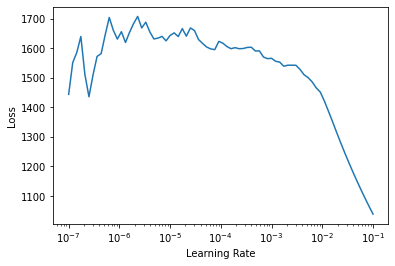

In [ ]:
learn.freeze()
learn.lr_find()

### Fine tune: 2 Phases
- Phase 1: Train the head for 3 epochs while freezing the body
- Phase 2: Train both the body and the head during 50 epochs

In [39]:
fname_model_best = "plantdoc-efficientdet-best"

In [ ]:
from fastai.callback.tracker import SaveModelCallback
learn.fine_tune(20, 0.012, freeze_epochs=3)

## Show results

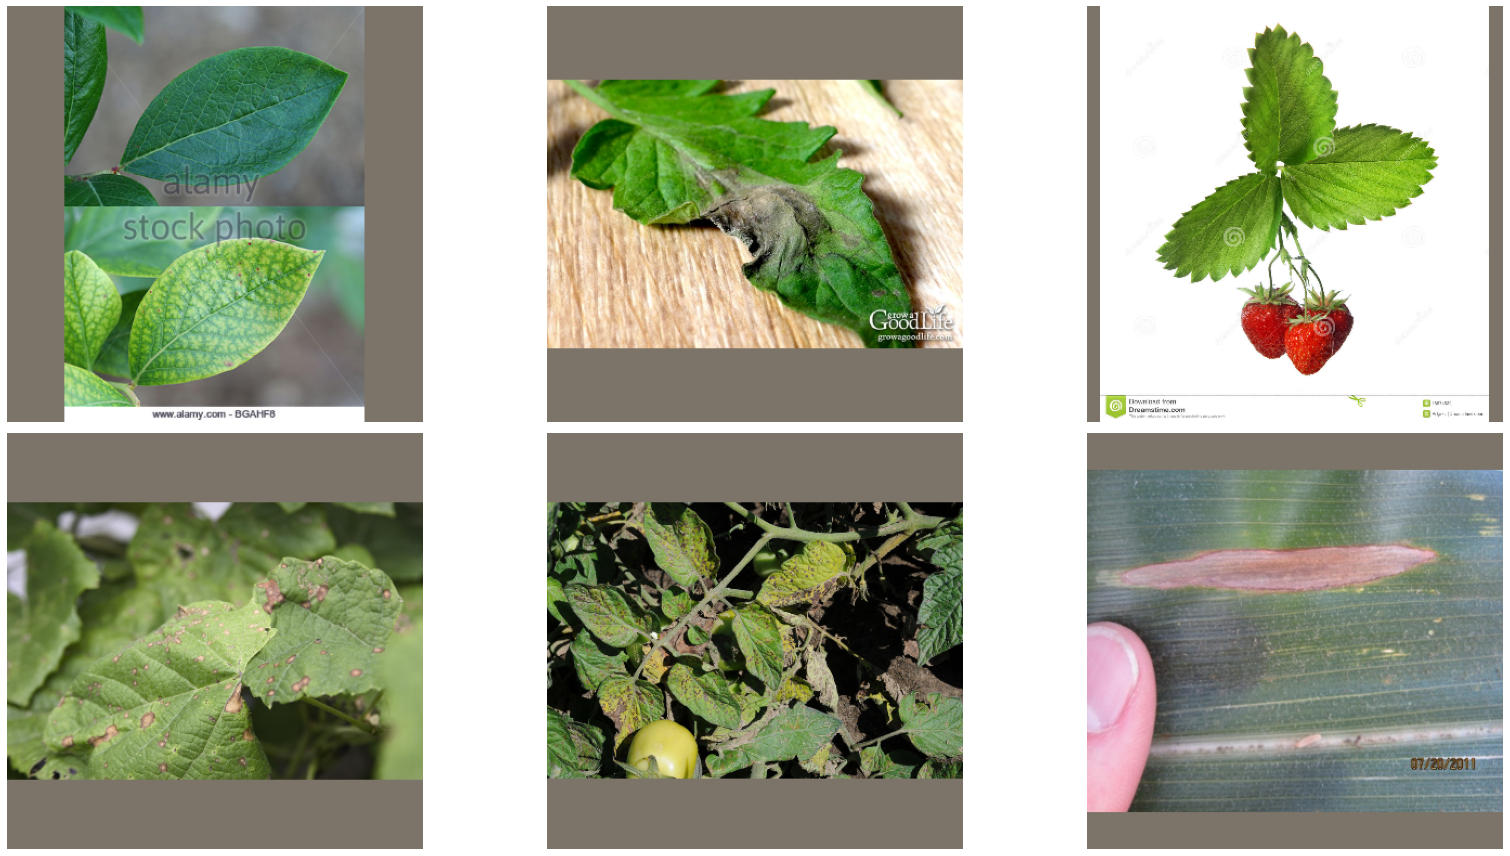

In [ ]:
model_type.show_results(model, valid_ds, class_map=class_map)

## Saving a Model on Google Drive

>Note: In this example, we suppose you have already created a folder called **models** in your Google Drive

In [ ]:
## Mount your Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = Path('/content/gdrive/My Drive/')

Mounted at /content/gdrive


### Saving the last model

In [ ]:
fname_model = "plantdoc-efficientdet.pth'
torch.save(model.state_dict(), root_dir/'models'/fname_model)

### Saving the best model

In [ ]:
!ls models

In [ ]:
!cp models/plantdoc-efficientdet-best.pth /content/gdrive/"My Drive"/models/plantdoc-efficientdet-best.pth

## Happy Learning!

If you need any assistance, feel free to join our [forum](https://discord.gg/JDBeZYK).